**NASA POWER Climate Data Analysis: Dhahran (2025)**

This project uses daily NASA POWER data (2025) to compute and visualize monthly average solar radiation in Dhahran, Saudi Arabia. The analysis highlights trends under clear-sky vs. all-sky conditions, relevant for energy modeling and climate research.


In [14]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load and inspect the file manually
with open('POWER_Point_Daily_20250101_20250730_026d26N_050d07E_LST.csv', 'r') as file:
    for i in range(20):
        print(f"{i}: {file.readline()}")

Saving POWER_Point_Daily_20250101_20250730_026d26N_050d07E_LST.csv to POWER_Point_Daily_20250101_20250730_026d26N_050d07E_LST (1).csv
0: -BEGIN HEADER-

1: NASA/POWER Source Native Resolution Daily Data 

2: Dates (month/day/year): 01/01/2025 through 07/30/2025 in LST

3: Location: latitude  26.2577   longitude 50.07 

4: elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 13.68 meters

5: The value for missing source data that cannot be computed or is outside of the sources availability range: -999 

6: parameter(s): 

7: ALLSKY_SFC_SW_DWN     CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (kW-hr/m^2/day) 

8: PS                    MERRA-2 Surface Pressure (kPa) 

9: T2M                   MERRA-2 Temperature at 2 Meters (C) 

10: WS10M                 MERRA-2 Wind Speed at 10 Meters (m/s) 

11: CLRSKY_SFC_SW_DWN     CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (kW-hr/m^2/day) 

12: -END HEADER-

13: YEAR,MO,DY,ALLSKY_SFC_SW_DWN,PS,T2M,

In [15]:
# Load the CSV file properly (skip header)
df = pd.read_csv('POWER_Point_Daily_20250101_20250730_026d26N_050d07E_LST.csv', skiprows=12)

# Show the first 5 rows
df.head()

-END HEADER-
YEAR MO DY ALLSKY_SFC_SW_DWN PS     T2M   WS10M  CLRSKY_SFC_SW_DWN
2025 1  1  3.2573            101.88 16.86 7.16              3.3482
        2  3.4049            102.15 15.67 7.29              3.4702
        3  3.6629            102.25 14.65 6.64               3.857
        4  3.978             102.22 14.58 5.2               4.2084

Column names: ['YEAR', 'MO', 'DY', 'ALLSKY_SFC_SW_DWN', 'PS', 'T2M', 'WS10M', 'CLRSKY_SFC_SW_DWN']


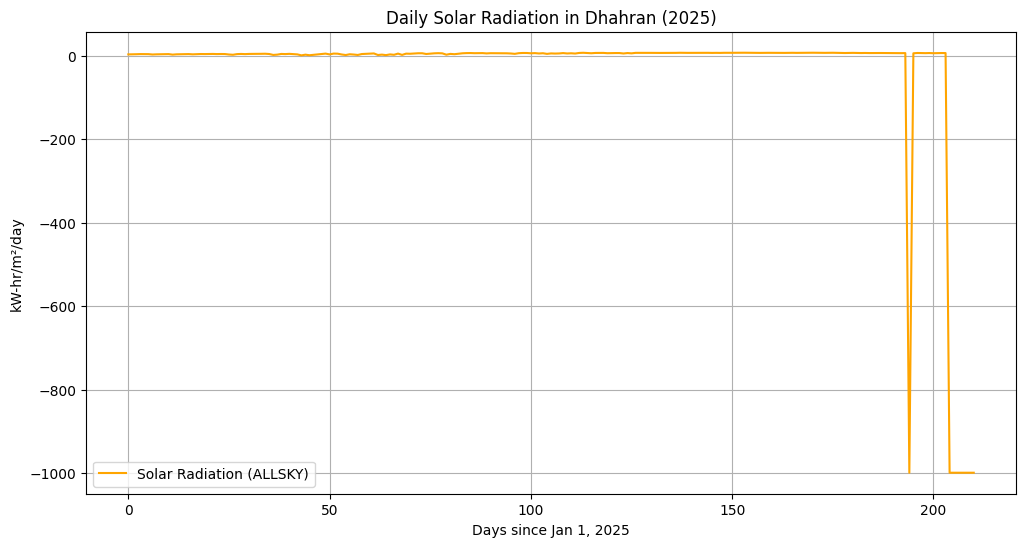

In [16]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load and clean the CSV file (skip 13 metadata rows)
df = pd.read_csv('POWER_Point_Daily_20250101_20250730_026d26N_050d07E_LST.csv', skiprows=13)

# Step 3: Strip whitespace from column names (important!)
df.columns = df.columns.str.strip()

# Step 4: Print column names to check for typos
print("Column names:", df.columns.tolist())

# Step 5: Rename columns for easier access (not necessary, but helpful)
df.rename(columns={
    'ALLSKY_SFC_SW_DWN': 'ALLSKY',
    'CLRSKY_SFC_SW_DWN': 'CLRSKY'
}, inplace=True)

# Step 6: Plot Solar Radiation (ALLSKY) over time
plt.figure(figsize=(12, 6))
plt.plot(df['ALLSKY'], label='Solar Radiation (ALLSKY)', color='orange')
plt.title('Daily Solar Radiation in Dhahran (2025)')
plt.xlabel('Days since Jan 1, 2025')
plt.ylabel('kW-hr/m²/day')
plt.grid(True)
plt.legend()
plt.show()

ALLSKY average (clipped): 5.21936682464455
CLRSKY average (clipped): 4.536271090047393


array([[<Axes: title={'center': 'ALLSKY'}>,
        <Axes: title={'center': 'CLRSKY'}>]], dtype=object)

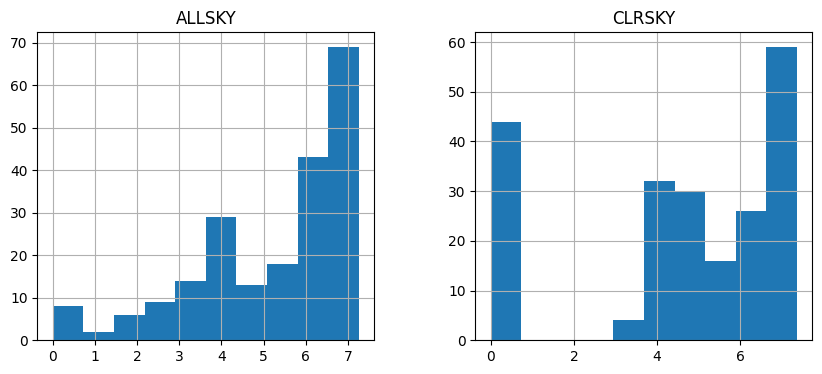

In [17]:
# Clip all negative values to zero
df['ALLSKY'] = df['ALLSKY'].clip(lower=0)
df['CLRSKY'] = df['CLRSKY'].clip(lower=0)

# Recheck average
print("ALLSKY average (clipped):", df['ALLSKY'].mean())
print("CLRSKY average (clipped):", df['CLRSKY'].mean())

# Replot histogram
df[['ALLSKY', 'CLRSKY']].hist(figsize=(10,4))

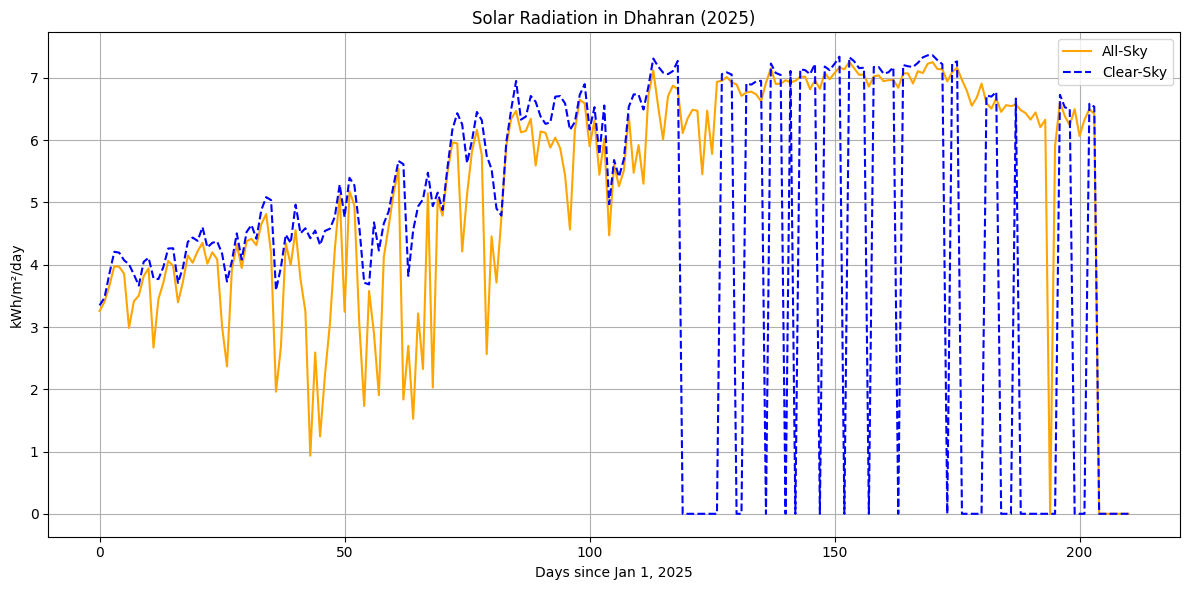

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['ALLSKY'], label='All-Sky', color='orange')
plt.plot(df['CLRSKY'], label='Clear-Sky', color='blue', linestyle='--')
plt.title('Solar Radiation in Dhahran (2025)')
plt.xlabel('Days since Jan 1, 2025')
plt.ylabel('kWh/m²/day')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
print(df.columns.tolist())

['YEAR', 'MO', 'DY', 'ALLSKY', 'PS', 'T2M', 'WS10M', 'CLRSKY']


In [20]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename
df.rename(columns={
    'ALLSKY_SFC_SW_DWN': 'ALLSKY',
    'CLRSKY_SFC_SW_DWN': 'CLRSKY',
    'YEAR': 'YEAR',
    'MO': 'MO',
    'DY': 'DY'
}, inplace=True)

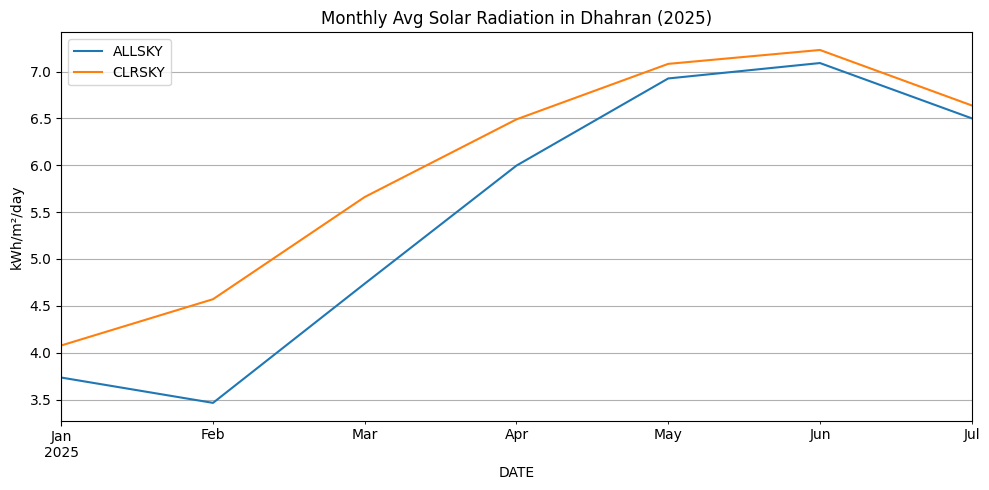

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV, skipping metadata
df = pd.read_csv('POWER_Point_Daily_20250101_20250730_026d26N_050d07E_LST (1).csv', skiprows=13)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Replace placeholder missing values (-999) with NaN
df.replace(-999, np.nan, inplace=True)

# Rename columns for clarity
df.rename(columns={
    'ALLSKY_SFC_SW_DWN': 'ALLSKY',
    'CLRSKY_SFC_SW_DWN': 'CLRSKY',
    'YEAR': 'year',
    'MO': 'month',
    'DY': 'day'
}, inplace=True)

# 🔧 Remove physically invalid (negative) radiation values
df['ALLSKY'] = df['ALLSKY'].where(df['ALLSKY'] >= 0, np.nan)
df['CLRSKY'] = df['CLRSKY'].where(df['CLRSKY'] >= 0, np.nan)

# Convert year, month, day into datetime
df['DATE'] = pd.to_datetime(df[['year', 'month', 'day']])

# Set DATE as index
df.set_index('DATE', inplace=True)

# Keep only rows with valid ALLSKY and CLRSKY values
df_clean = df[['ALLSKY', 'CLRSKY']].dropna()

# Plot monthly average solar radiation
df_clean.resample('ME').mean().plot(
    figsize=(10, 5),
    title='Monthly Avg Solar Radiation in Dhahran (2025)'
)
plt.ylabel('kWh/m²/day')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
plt.savefig('monthly_avg_solar_radiation.png')

<Figure size 640x480 with 0 Axes>

<Axes: title={'center': 'Monthly Difference Between ALLSKY and CLRSKY (2025)'}, xlabel='DATE', ylabel='kWh/m²/day'>

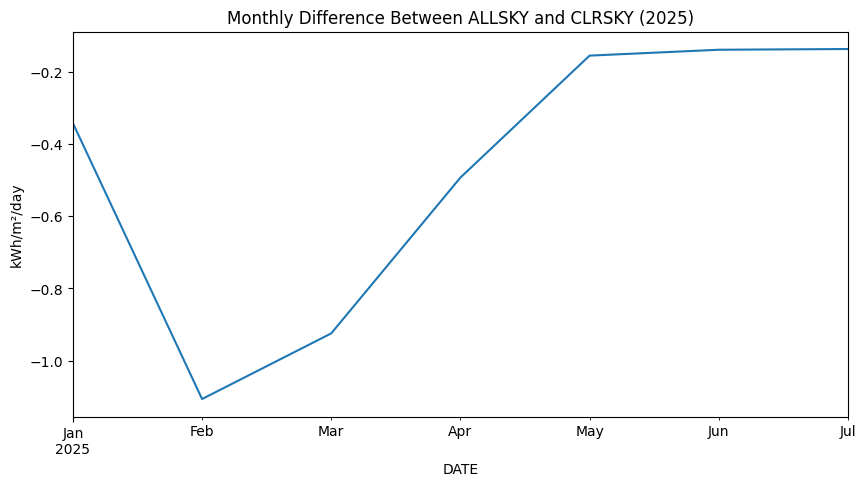

In [24]:
df_clean['DIFF'] = df_clean['ALLSKY'] - df_clean['CLRSKY']
df_clean['DIFF'].resample('ME').mean().plot(
    figsize=(10, 5),
    title='Monthly Difference Between ALLSKY and CLRSKY (2025)',
    ylabel='kWh/m²/day'
)